In [24]:
from langchain_google_vertexai import ChatVertexAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from IPython import display
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "vtxclass-vertexai.json"

model = ChatVertexAI(
    model="gemini-1.5-flash-001",
    temperature=0,
    max_tokens=None,
    max_retries=2,
    stop=None,
)

In [25]:
# https://media.zenfs.com/ko/news_tvbs_com_tw_938/055b44a97079c44e88067c0040bdd0d9

# Preapre the image
import base64
import httpx

image_url = "https://media.zenfs.com/ko/news_tvbs_com_tw_938/055b44a97079c44e88067c0040bdd0d9"
image_data = base64.b64encode(httpx.get(image_url).content).decode("utf-8")

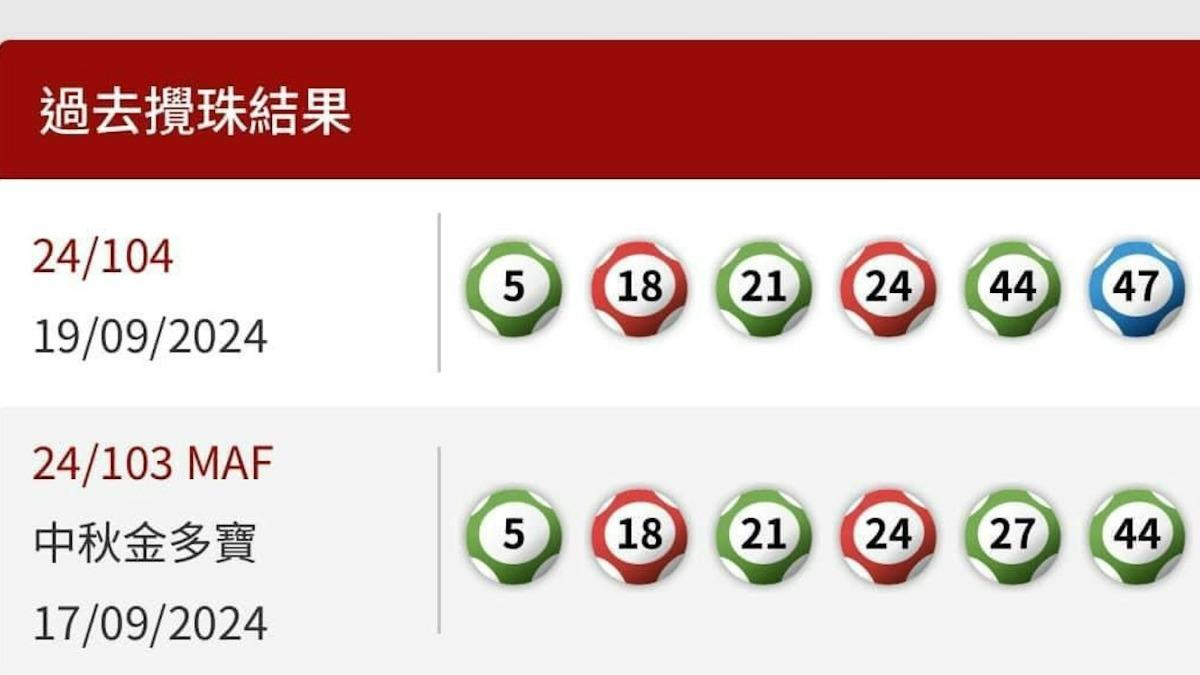

In [26]:
display.Image(base64.b64decode(image_data))

In [8]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are expert in extracting lottery result in given screenshots."),
        (
            "user",
            [
                "Please extract the lottery result from the following image. This is a lottery result of a lottery called Mark Six in Hong Kong. Each result will have 7 numbers, where the last one which is usually in bracket is the special number.",
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/jpeg;base64,{image_data}"},
                }
            ],
        ),
    ]
)

In [11]:
marksixagent = prompt | model

In [12]:
response = marksixagent.invoke({"image_data": image_data})
print(response.content)


The lottery results are:

**24/104:** 5, 18, 21, 24, 44, 47 (special number)
**24/103 MAF:** 5, 18, 21, 24, 27, 44 (special number) 

